# 네이버 지식인 여친선물 답변 크롤링

In [1]:
import numpy as np
import pandas as pd
import folium, json

import warnings
warnings.filterwarnings('ignore')

import requests
from bs4 import BeautifulSoup
from urllib.parse import quote
from tqdm.notebook import tqdm

import re
import time

import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

In [7]:
# url
i = 1
keyword = "여친선물" 
url = f'https://kin.naver.com/search/list.naver?query={quote(keyword)}&page={i}'

req = requests.get(url)
soup = BeautifulSoup(req.text, 'html.parser')

In [93]:
answerList=[]
keyword = "여친선물" 

for i in range(1,11):
    url = f'https://kin.naver.com/search/list.naver?query={quote(keyword)}&page={i}'

    req = requests.get(url)
    soup = BeautifulSoup(req.text, 'html.parser')

    for li in soup.select(".basic1 li"):
        try: 
            driver = webdriver.Chrome()
            li_url = li.select_one('a')['href']
            driver.get(li_url)
            time.sleep(2)

            ans_num = int(driver.find_element(By.CSS_SELECTOR, ".c-classify__title em").text)
            
            if ans_num%5 == 0:
                plus = int(ans_num / 5)-1
            else :
                plus = int(ans_num / 5)

            for j in range(0,plus):
                driver.find_element(By.CSS_SELECTOR, "#nextPageButton").click()
                time.sleep(1)

            li_soup = BeautifulSoup(driver.page_source, 'html.parser')

            for p in li_soup.select("._endContents"):
                try : 
                    answerList.append(p.select_one(".se-module").text)
                except :
                    answerList.append(p.select_one("._endContentsText").text)
            
            driver.close()
            time.sleep(1)
        except :
            print(li_url)
            break

In [99]:
hw_answer = pd.DataFrame(answerList)
hw_answer.to_csv('hw_answer.csv', index=False)
hw_answer

,0
0,여친선물로​데일리로맨틱 오르골 무드등 강추요​여친선물 BEST입니다~^^ 후기봐보...
1,먼저 여친의 생일을 축하합니다!​20대 초반 여친 생일선물 추천드립니다.20대 여...
2,인기있는 여친선물 리스트 말고뭔가 특별한 선물이어야 하지 않을까요?​정성스런 손편...
3,"20대 초반 여자친구 선물로사랑 문답, 펜디 카드지갑, 꽃다발 추천드려요!!카드지..."
4,여자친구 선물 고민중이시면 목걸이 완전 추천해요!오랫동안 간직할수도 있고 여자친구...
...,...
621,꽃이고 반지고 목걸이고 남자들이 사는거 꺼려지는거내가 잘 알지. 글씨도 잘 못써서 ...
622,여친선물 추천사이트들 모아둔 곳 소개합니다!!여친선물에 대해서 알아보고 계시는군요^...
623,여자선물은 목걸이나 귀걸이가 최고아닌가요 ㅋㅋㅋㅋ 몇개추천함..다이아티니하트 목걸이...
624,선물 베스트 20 1. 공책2. 지갑(빨간게좋음)3. 커플링4. 색볼펜5. 스케치북...


## 강사님 방법

In [106]:
base_url = "https://kin.naver.com/search/list.naver?query="
url = base_url + quote("여친선물")
driver = webdriver.Chrome()

In [117]:
answer_list = []
driver = webdriver.Chrome()
for page in range(1,11):
    print('page', page)
    url = f'{base_url}{quote("여친선물")}&page={page}'
    driver.get(url)
    time.sleep(1)
    
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    lis = soup.select('ul.basic1>li')
    
    for li in lis:
        sub_url = li.select_one('a._searchListTitleAnchor')['href']
        driver.get(sub_url)
        time.sleep(1)
        
        count = int(driver.find_element(By.CSS_SELECTOR,"._answerCount.num").text)
        answer_page=(count-1)//5
        
        for i in range(answer_page):
            driver.find_element(By.ID, 'nextPageButton').click()
            time.sleep(1)
        
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        divs = soup.select('div.answer-content__item._contentWrap._answer')
        for div in divs:
            ps = div.select('p.se-text-paragraph')
            for p in ps:
                text = p.get_text()
                if text == " " or text == "\u200b":
                    continue
                answer_list.append(text)
        driver.back()
        time.sleep(1)

page 1
page 2
page 3
page 4
page 5
page 6
page 7
page 8
page 9
page 10


In [114]:
soup.select('ul.basic1>li')[0].select_one('a._searchListTitleAnchor')['href']

'https://kin.naver.com/qna/detail.naver?d1id=5&dirId=511&docId=443958205&qb=7Jes7Lmc7ISg66y8&enc=utf8&section=kin&rank=1&search_sort=0&spq=0'

In [119]:
with open('gf_gift.txt',"w",encoding='utf-8') as f :
    for answer in answer_list:
        f.write(answer + '\n')

# 워드 클라우드 시각화

In [4]:
import pandas as pd
with open('gf_gift.txt',encoding='utf-8') as file :
    text = file.read()

In [7]:
text

'여친선물로\n데일리로맨틱 오르골 무드등 강추요\n여친선물 BEST입니다~^^ 후기봐보세요\n먼저 여친의 생일을 축하합니다!\n20대 초반 여친 생일선물 추천드립니다.\n20대 여성분들 많이 꾸미는 시기이기에 향수, 립스틱, 의류, 목걸이 등이 좋을 것 같구요.\n선물의 끝은 "감동"이므로 손편지와 작은 꽃다발 함께 하면 더 좋을 것 같습니다. \n다시 한 번 축하합니다. :)\n인기있는 여친선물 리스트 말고\n뭔가 특별한 선물이어야 하지 않을까요?\n정성스런 손편지가 1번입니다.\n손편지를 써서 드리셔야 다른 선물이 빛을 발할수 있습니다~\n그리고\n나없을때도 내생각하라는 말과 함께\n대형인형 추천드려요~\n껴안고 잘 수도 있고, 침실인테리어로도 쓸수있고요~\n마지막으로\n이건 좀더 사랑을 담아 고백하는 의미로\n드릴때 쓰는거긴 한데\n사귄지 얼마 안되셨으면 써도 좋고\n기념일에 사용하셔도 좋습니다~\n20대 초반 여자친구 선물로\n사랑 문답, 펜디 카드지갑, 꽃다발 추천드려요!!\n카드지갑이랑 꽃다발 주면서\n사랑 문답까지 작성해서 같이 선물로 주면\n여자친구분 감동 받습니다\n한번 참고라도 해보시고 결정해 보세여\nhttps://link.coupang.com/a/Vhl2F\nhttps://link.coupang.com/a/Vhl6O\nhttps://link.coupang.com/a/Vhme2\n파트너스 활동의 일환으로 이에 따른 일정액의 수수료를 받을 수 있습니다.\n여자친구 선물 고민중이시면 목걸이 완전 추천해요!\n오랫동안 간직할수도 있고 여자친구가 직접 끼고 다닐수도 있으니까 더 특별한 선물이될거예요! \nhttps://smartstore.naver.com/fossette43/products/5792689156\nhttps://smartstore.naver.com/fossette43/products/6593602515\nhttps://smartstore.naver.com/fossette43/products/7339358460\n안녕하세요! 공연기획사

In [43]:
# 한글 형태소 분석기
from wordcloud import WordCloud, STOPWORDS
from PIL import Image # 그림을 불러오는 패키지
import numpy as np
import matplotlib.pyplot as plt

import nltk
# nltk.download('punkt')
from nltk.corpus import stopwords
from konlpy.tag import Okt, Kkma, Komoran # 세가지 방법이 있음

from matplotlib import font_manager, rc 
import matplotlib.pyplot as plt
import matplotlib as mpl

# 마이너스 표시
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

# 한글 경로
font_path = r"C:\Windows\Fonts\malgun.ttf"

In [44]:
# 인스턴스 생성
okt = Okt()
kkma = Kkma()
komoran = Komoran()

In [45]:
# 명사만 추출
tokens = okt.nouns(text)

In [46]:
tokens[80:120]

['지갑',
 '꽃다발',
 '추천',
 '카드',
 '지갑',
 '꽃다발',
 '사랑',
 '문답',
 '작성',
 '선물',
 '여자친구',
 '감동',
 '한번',
 '참고',
 '결정',
 '파트너',
 '스',
 '활동',
 '일환',
 '이',
 '정액',
 '수수료',
 '수',
 '여자친구',
 '선물',
 '고민',
 '시',
 '목걸이',
 '완전',
 '추천',
 '간',
 '직할',
 '수도',
 '여자친구',
 '직접',
 '끼',
 '더',
 '선물',
 '공연',
 '기획사']

In [47]:
# 영문자, 숫자, 부호제거
import re
tokens = [re.sub('[^가-힣]','',token) for token in tokens]

In [48]:
len(tokens)

13808

## 다음과정을 반복해서 불용어 정리

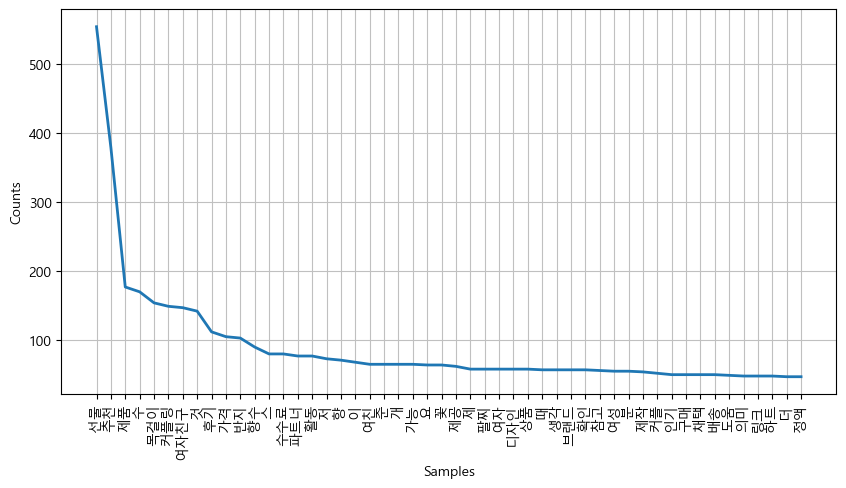

In [49]:
# 현재 무슨 단어가 많은지 시각화
gift = nltk.Text(tokens, name = '여친선물')
plt.figure(figsize=(10,5))
gift.plot(50)
plt.show()

In [50]:
stoptext = '''
선물 추천 제품 수 여자친구 것 후기 가격 스 수수료 파트너 활동 저 향 이 여친 준 개
가능 요 제공 제 여자 디자인 상품 때 생각 브랜드 확인 참고 여성 분 제작 커플 인기 
구매 채택 배송 도움 의미 링크 하트 더 정액
'''

In [51]:
stop_words = stoptext.split()
stop_words

['선물',
 '추천',
 '제품',
 '수',
 '여자친구',
 '것',
 '후기',
 '가격',
 '스',
 '수수료',
 '파트너',
 '활동',
 '저',
 '향',
 '이',
 '여친',
 '준',
 '개',
 '가능',
 '요',
 '제공',
 '제',
 '여자',
 '디자인',
 '상품',
 '때',
 '생각',
 '브랜드',
 '확인',
 '참고',
 '여성',
 '분',
 '제작',
 '커플',
 '인기',
 '구매',
 '채택',
 '배송',
 '도움',
 '의미',
 '링크',
 '하트',
 '더',
 '정액']

In [52]:
# stop_words에 포함되지 않은 token을 tokens에 넣어라
tokens = [token for token in tokens if token not in stop_words]

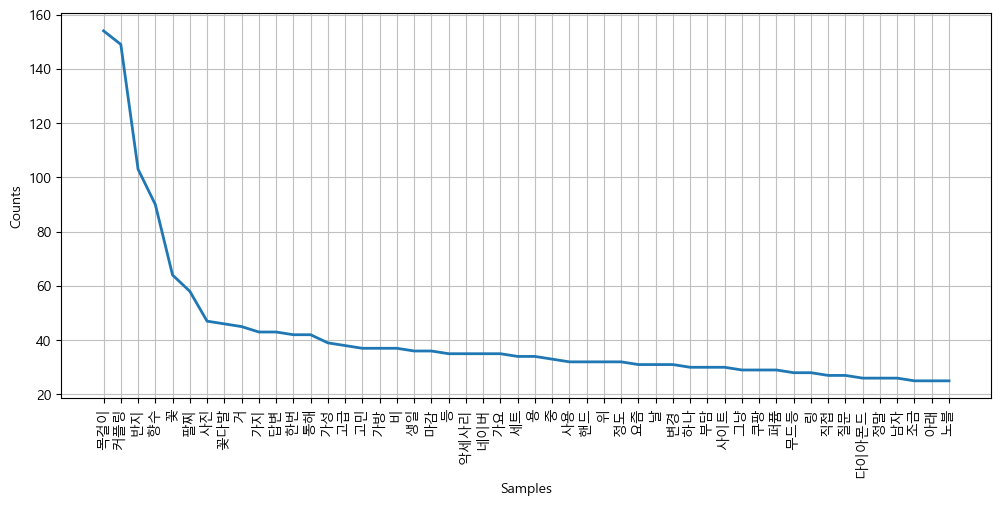

In [53]:
# 제거하고 남은 현재 무슨 단어가 많은지 시각화
gift = nltk.Text(tokens, name = '여친선물')
plt.figure(figsize=(12,5))
gift.plot(50)
plt.show()

In [54]:
# 다시 또 체크 후 불용어에 추가
stoptext = '''
선물 추천 제품 수 여자친구 것 후기 가격 스 수수료 파트너 활동 저 향 이 여친 준 개
가능 요 제공 제 여자 디자인 상품 때 생각 브랜드 확인 참고 여성 분 제작 커플 인기 
구매 채택 배송 도움 의미 링크 하트 더 정액
거 가지 답변 한번 통해 가성 고급 고민 비 생일 마감 등 네이버 가요 세트 용 중
사용 핸드 위 정도 요즘 날 변경 하나 부담 사이트 그냥 쿠팡 직접 질문 정말 남자 조금 아래
'''

In [55]:
# stop_words에 포함되지 않은 token을 tokens에 넣어라
stop_words = stoptext.split()
tokens = [token for token in tokens if token not in stop_words]

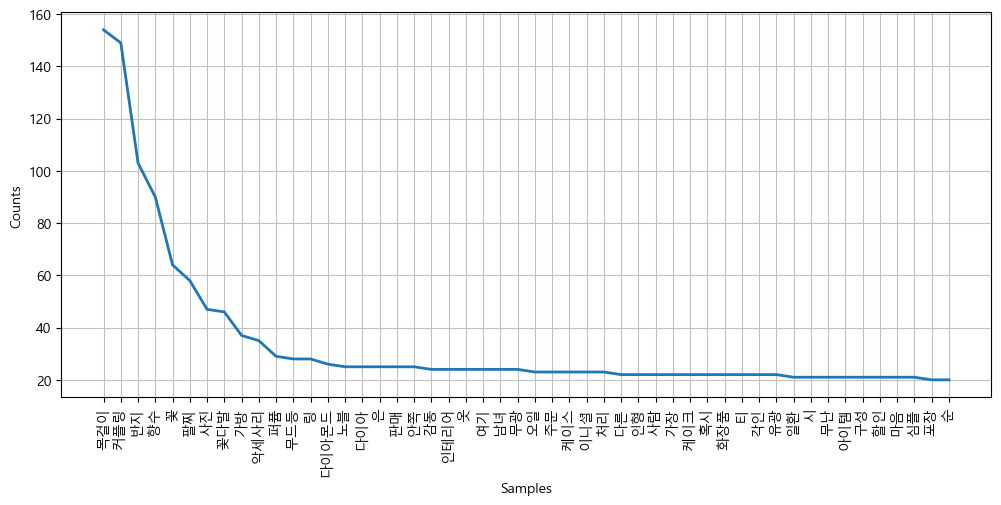

In [56]:
# 제거하고 남은 현재 무슨 단어가 많은지 시각화
gift = nltk.Text(tokens, name = '여친선물')
plt.figure(figsize=(12,5))
gift.plot(50)
plt.show()

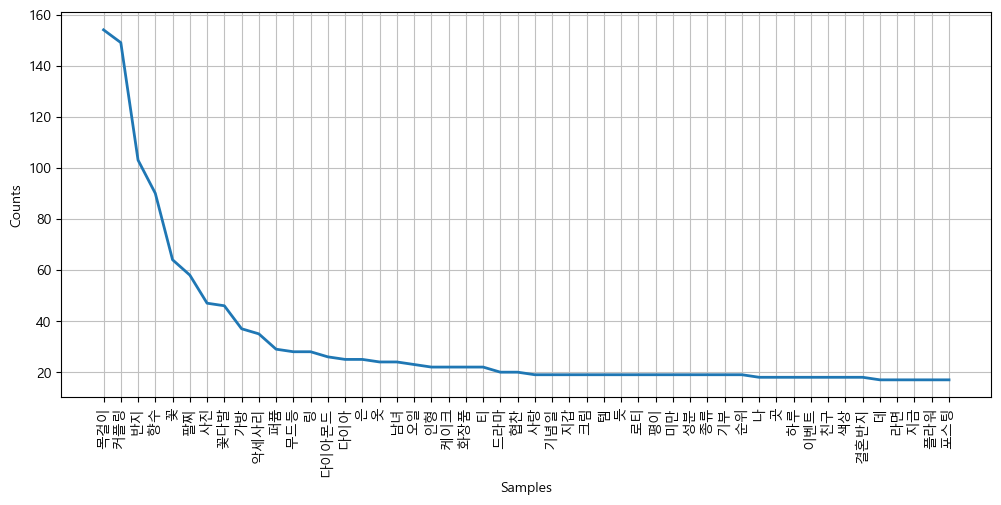

In [57]:
# 다시 또 체크 후 불용어에 추가
stoptext = '''
선물 추천 제품 수 여자친구 것 후기 가격 스 수수료 파트너 활동 저 향 이 여친 준 개
가능 요 제공 제 여자 디자인 상품 때 생각 브랜드 확인 참고 여성 분 제작 커플 인기 
구매 채택 배송 도움 의미 링크 하트 더 정액
거 가지 답변 한번 통해 가성 고급 고민 비 생일 마감 등 네이버 가요 세트 용 중
사용 핸드 위 정도 요즘 날 변경 하나 부담 사이트 그냥 쿠팡 직접 질문 정말 남자 조금 아래
노블 판매 안쪽 감동 인테리어 여기 남여 무광 주문 케이스 이니셜 처리 다른 사람 가장 
혹시 각인 유광 일환 시 무난 아이템 구성 할인 마음 심플 포장 순 바로
'''

# stop_words에 포함되지 않은 token을 tokens에 넣어라
stop_words = stoptext.split()
tokens = [token for token in tokens if token not in stop_words]

# 제거하고 남은 현재 무슨 단어가 많은지 시각화
gift = nltk.Text(tokens, name = '여친선물')
plt.figure(figsize=(12,5))
gift.plot(50)
plt.show()

In [58]:
# 빈도수 많은 순으로 단어 300개만 골라서 넣어라
data = gift.vocab().most_common(300)
font_path = r"C:\Windows\Fonts\malgun.ttf"
wc = WordCloud(background_color='white', font_path=font_path).generate_from_frequencies(dict(data))

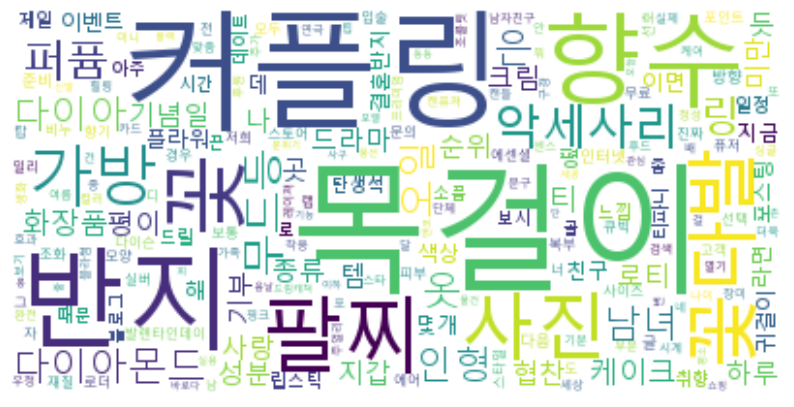

In [59]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

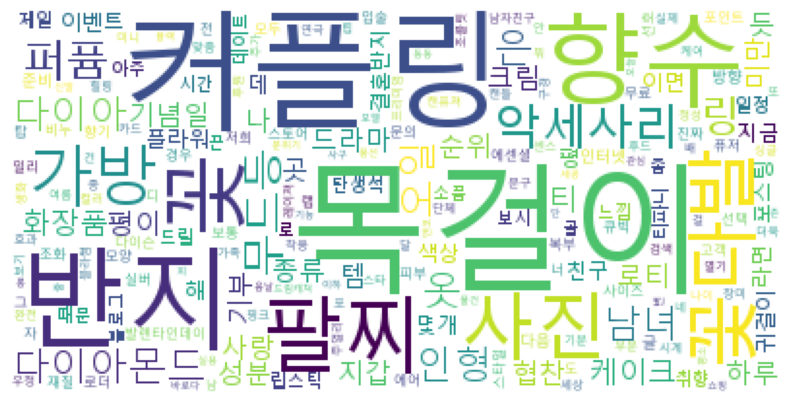

In [62]:
plt.figure(figsize=(10,6))
plt.imshow(wc)
plt.axis('off')
plt.show()